In [2]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import warnings
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [3]:
# Import du dataframe "data.csv"
df=pd.read_csv('data.csv',decimal=",")
df.head(3)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes


### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [4]:
print("Dans cette base de données il y a {0:d} observations\n".format(df.shape[0]))
print("La somme des valeurs manquantes pour chaque caractéristiques est: ")
print(df.isna().sum())


Dans cette base de données il y a 9582 observations

La somme des valeurs manquantes pour chaque caractéristiques est: 
Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64


### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [5]:
mask_nan_ds = df['Metier'] == 'Data scientist'
mask_nan_de = df['Metier'] == 'Data engineer'
print("Avant l\'imputation :\n")
print("La somme des valeurs manquantes de la variable Expérience pour le profil Data Scientist:"+str((df.loc[mask_nan_ds,'Experience']).isna().sum()))
print("La somme des valeurs manquantes de la variable Expérience pour le profil Data Engineer:"+str((df.loc[mask_nan_de,'Experience']).isna().sum()))
# remplire les valeurs manquantes de Data Engineers par la valeur moyenne
mask_nan_de = df['Metier'] == 'Data engineer'
Mean_DE = df[mask_nan_de]['Experience'].dropna().mean()
df.loc[mask_nan_de, 'Experience'] = df.loc[mask_nan_de, 'Experience'].fillna(Mean_DE)
# remplire les valeurs manquantes de Data Scientists par la valeur médiane
mask_nan_ds = df['Metier'] == 'Data scientist'
Median_DS = df[mask_nan_ds]['Experience'].dropna().median()
df.loc[mask_nan_ds, 'Experience'] = df.loc[mask_nan_ds, 'Experience'].fillna(Median_DS)
print("\nAprés l\'imputation :\n")
print("La somme des valeurs manquantes de la variable Expérience pour le profil Data Scientist:"+str((df.loc[mask_nan_ds,'Experience']).isna().sum()))
print("La somme des valeurs manquantes de la variable Expérience pour le profil Data Engineer:"+str((df.loc[mask_nan_de,'Experience']).isna().sum()))


Avant l'imputation :

La somme des valeurs manquantes de la variable Expérience pour le profil Data Scientist:32
La somme des valeurs manquantes de la variable Expérience pour le profil Data Engineer:20

Aprés l'imputation :

La somme des valeurs manquantes de la variable Expérience pour le profil Data Scientist:0
La somme des valeurs manquantes de la variable Expérience pour le profil Data Engineer:0


### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [6]:
# remplire les valeurs manquantes de Data Scientist par la valeur moyenne
Mean_DS = df[mask_nan_ds]['Experience'].dropna().mean()
df.loc[mask_nan_ds, 'Experience'] = df.loc[mask_nan_ds, 'Experience'].fillna(Mean_DS)
# remplire les valeurs manquantes de Lead Data Scientist par la valeur moyenne
mask_nan_lds = df['Metier'] == 'Lead data scientist'
Mean_LDS = df[mask_nan_lds]['Experience'].dropna().mean()
df.loc[mask_nan_lds, 'Experience'] = df.loc[mask_nan_lds, 'Experience'].fillna(Mean_LDS)
# remplire les valeurs manquantes de Data Architecte par la valeur moyenne
mask_nan_da = df['Metier'] == 'Data architecte'
Mean_DA = df[mask_nan_da]['Experience'].dropna().mean()
df.loc[mask_nan_da, 'Experience'] = df.loc[mask_nan_da, 'Experience'].fillna(Mean_DA)
#Affichge
print("Les années d'experiences en moyenne pour chaque profil:\n")
print("Lead data scientist : {0:f} ".format(Mean_LDS))
print("Data architecte     : {0:f} ".format(Mean_DA))
print("Data enginner       : {0:f} ".format(Mean_DE))
print("Data scientist      : {0:f} ".format(Mean_DS))

Les années d'experiences en moyenne pour chaque profil:

Lead data scientist : 3.965261 
Data architecte     : 3.000476 
Data enginner       : 2.984959 
Data scientist      : 2.241268 


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

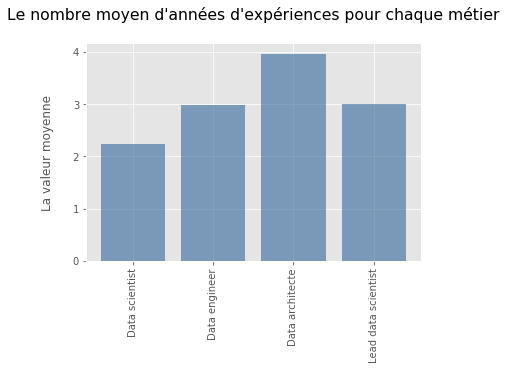

In [7]:
plt.figure()
plt.subplot(111)
X=df['Metier'].value_counts().keys()
Y=[Mean_DS,Mean_DE,Mean_LDS,Mean_DA]
plt.bar(X,Y,color=(0.2, 0.4, 0.6, 0.6))
sb.set_context("talk")
plt.xticks(X,rotation=90)
plt.ylabel("La valeur moyenne\n")
plt.title("Le nombre moyen d'années d'expériences pour chaque métier\n")
plt.show()

### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

In [8]:
df['Exp_label']= pd.cut(df.Experience,4 , labels=['Debutant','Confirme','Avance','Expert'])
df.head(10)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Debutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,Debutant
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,Debutant
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,Debutant
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,Debutant
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,Confirme
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,Debutant
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,Debutant
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris,Confirme
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse,Debutant


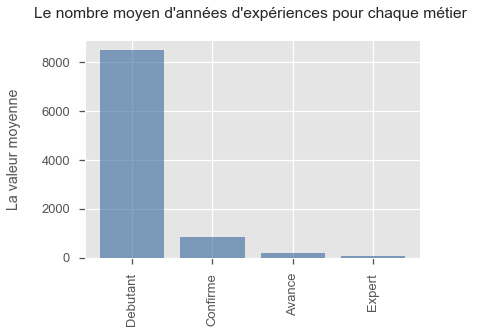

In [26]:
plt.figure()
plt.subplot(111)
X=df['Exp_label'].value_counts().keys()
Y=df['Exp_label'].value_counts().values
plt.bar(X,Y,color=(0.2, 0.4, 0.6, 0.6))
sb.set_context("talk")
plt.xticks(X,rotation=90)
plt.ylabel("La valeur moyenne\n")
plt.title("Le nombre moyen d'années d'expériences pour chaque métier \n")
plt.show()

### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

SQL/R/Python//Big data                                539
SAS/Teradata/SQL/R/Python/Machine learning/Anglais    458
C++/R/Python/Matlab/Matplotlib                        273
SPSS/Excel/SAS/R/machine learning/AI/Scoring          250
Hadoop/Hive/Vertica/Tableau                           250
Name: Technologies, dtype: int64


Text(0.5,1,'Les 5 top technologies les plus utilisés')

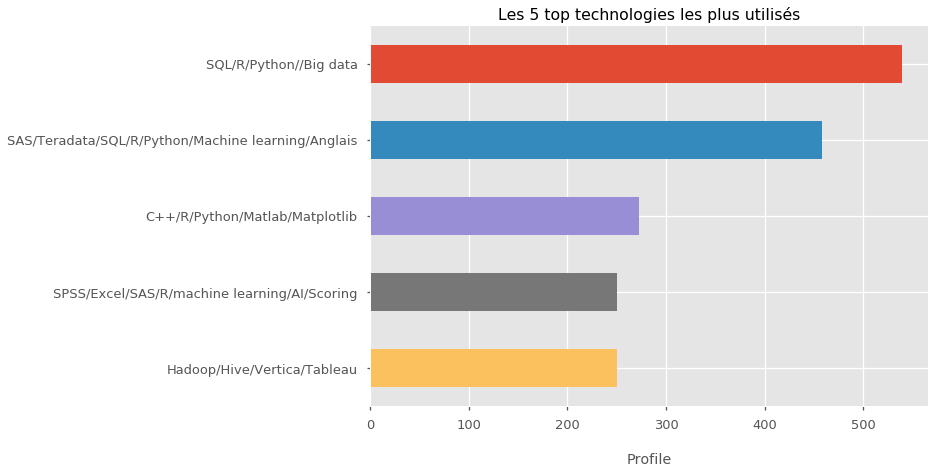

In [9]:
Top_5_tech = df['Technologies'].value_counts()[0:5]
print(Top_5_tech)

# Affichage de résultat
ax = Top_5_tech.plot(kind='barh', figsize=(10,7))
ax.invert_yaxis()
plt.xlabel("\nProfile")
plt.title('Les 5 top technologies les plus utilisés')

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

##### - Avant de commencer, il faut coder la base de données pour pouvoir mener le calculs par la suite.

In [10]:
le = preprocessing.LabelEncoder()
df_enc = df.loc[:,['Experience']]
df_enc['Ville_enc'] = pd.Series(le.fit_transform(np.squeeze(df.loc[:,['Ville']])[:]), index = df_enc.index)
df_enc['Technologies_enc'] = pd.Series(le.fit_transform(np.squeeze(df.loc[:,['Technologies']])[:]), index = df_enc.index)
df_enc['Diplome_enc'] = pd.Series(le.fit_transform(np.squeeze(df.loc[:,['Diplome']])[:]), index = df_enc.index)
df_enc['Exp_label_enc'] = pd.Series(le.fit_transform(np.squeeze(df.loc[:,['Exp_label']])[:]), index = df_enc.index)
df_enc = np.round(df_enc,2)
df_enc.head(5)

,Experience,Ville_enc,Technologies_enc,Diplome_enc,Exp_label_enc
0,1.0,8,27,1,2
1,3.0,4,34,1,2
2,3.0,6,51,1,2
3,1.5,4,2,1,2
4,2.0,0,26,3,2


##### - La méthode choisi pour le clustering est K-Means, pour sa simplicité et la connaissance du nombre de cluster

In [11]:
X = df_enc.astype(float)
# feature scaling with MinMaxscaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, max_iter = 100, algorithm = 'auto')
kmeans.fit(X_scaled)
labels_ = kmeans.labels_
c1, c2 = kmeans.cluster_centers_

##### - La métrique utilisée est l'erreur moyenne quadratique normalisée

In [12]:
# Evaluation de l'erreur de clustering
NMSE = lambda a,b: 100 * ((a-b)**2).sum() / ((a)**2).sum()
NMSE_1 = NMSE(X_scaled[labels_==0], c1) 
NMSE_2 = NMSE(X_scaled[labels_==1], c2)
print(' NMSE  cluster 1: {0:2.2f}%'.format(NMSE_1))
print(' NMSE  cluster 2: {0:2.2f}%'.format(NMSE_2))

 NMSE  cluster 1: 19.21%
 NMSE  cluster 2: 11.85%


##### Les erreurs moyennes quadratiques normalisées pour les deux clusteres sont moins de 20%.

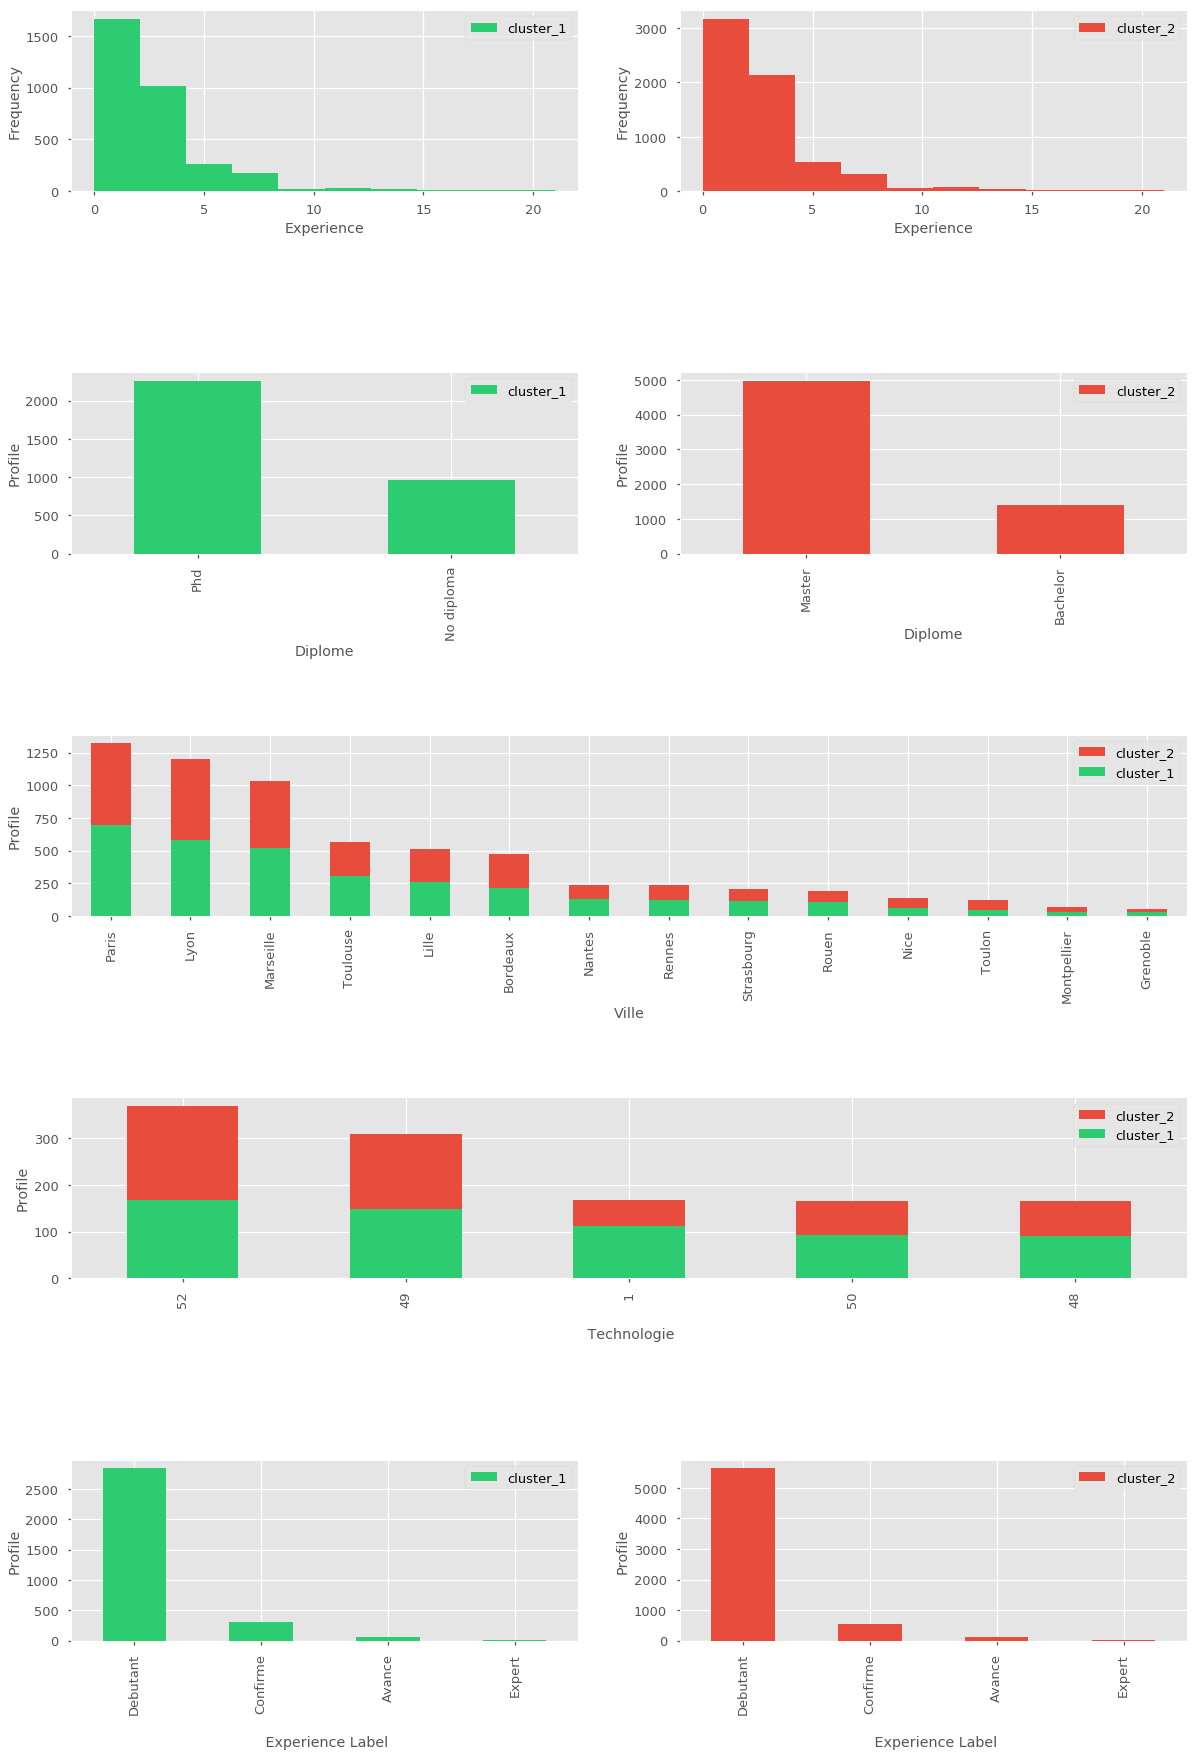

In [13]:
plt.figure(figsize=(20,30))
plt.subplot(521),
ax = df_enc.loc[labels_==1,'Experience'].plot(kind='hist', color='#2ecc71', label='cluster_1')
plt.legend()
plt.xlabel("Experience")
plt.subplot(522),
ax = df_enc.loc[labels_==0,'Experience'].plot(kind='hist', color='#e74c3c', label='cluster_2')
plt.xlabel("Experience")
plt.legend()

plt.subplot(523),
ax = df.loc[labels_==1,'Diplome'].value_counts().plot(kind='bar', color='#2ecc71', label='cluster_1')
plt.xlabel("Diplome")
plt.ylabel("Profile")
plt.legend()
plt.subplot(524),
ax = df.loc[labels_==0,'Diplome'].value_counts().plot(kind='bar', color='#e74c3c', label='cluster_2')
plt.xlabel("Diplome")
plt.ylabel("Profile")
plt.legend()

plt.subplot(513),
ax = df.loc[labels_==0,'Ville'].value_counts().plot(kind='bar', color = '#e74c3c', label='cluster_2')
ax = df.loc[labels_==1,'Ville'].value_counts().plot(kind='bar', color = '#2ecc71', label='cluster_1')
plt.ylabel("Profile")
plt.xlabel("Ville")
plt.legend()

plt.subplot(514),
ax = df_enc.loc[labels_==0,'Technologies_enc'].value_counts()[0:5].plot(kind='bar', color = '#e74c3c', label='cluster_2')
ax = df_enc.loc[labels_==1,'Technologies_enc'].value_counts()[0:5].plot(kind='bar', color = '#2ecc71', label='cluster_1')
plt.ylabel("Profile")
plt.xlabel("\n Technologie")
plt.legend()

plt.subplot(529)
ax=df.loc[labels_==1,'Exp_label'].value_counts().plot(kind='bar', color='#2ecc71', label='cluster_1')
plt.ylabel("Profile")
plt.xlabel("\n Experience Label")
plt.legend()
plt.subplot(5,2,10)
ax=df.loc[labels_==0,'Exp_label'].value_counts().plot(kind='bar', color='#e74c3c', label='cluster_2')
plt.ylabel("Profile")
plt.xlabel("\n Experience Label")
plt.legend()

plt.subplots_adjust(hspace=1)

#### - Les caracteristiques les plus imortantes des deux clusteres sont le Diplome et l'Experience:
##### Première Caractérstique est le Diplome :
 - Cluster 1 : Master  et Bachelor.
 - Cluster 2 : No diplome et PhD.
##### Deuxièmes Caractérstique est l'Expérience :
 - Le nombre d'année d'Experience des profiles du premier cluster est beaucoup plus élevés par rapport aux profiles du deuxieme cluster.

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

In [32]:
mask_metier = df.loc[:,'Metier'].isna()
# Préparation de la base de donnée sans métier nulle
X = np.array(df_enc[~mask_metier])
y = le.fit_transform(df.loc[~mask_metier,'Metier'].dropna())
#Metier_na contient les donnée avec la caractéristique du metier est nulle.
Metier_na = np.array(df_enc[mask_metier])
#Diviser les données 75% pour l'entrainement et 25% pour le test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.25, shuffle=True , random_state=40)

##### - Aprés une comparaison de trois modéles de Machine Learning relativement à la métrique de la précision, j'ai choisi le modéle (les K plus proches voisins) qui a la précision la plus élevé pour la prédicition des métiers manquants

In [33]:
model = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)

In [34]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted) 
print('Matrice de confusion :\n')
print(cm)
print('\nLe rapport de classificiation :\n')
print(classification_report(y_test,y_predicted))

Matrice de confusion :

[[483  44  12   3]
 [ 85 452  17   3]
 [ 27  33 872  56]
 [  8   9 181 106]]

Le rapport de classificiation :

             precision    recall  f1-score   support

          0       0.80      0.89      0.84       542
          1       0.84      0.81      0.83       557
          2       0.81      0.88      0.84       988
          3       0.63      0.35      0.45       304

avg / total       0.79      0.80      0.79      2391



In [35]:
print("La précision :"+str(accuracy_score(y_test, y_predicted)*100)+' %')

La précision :80.00836470096195 %


In [40]:
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
#Prédicition les métiers manquants par notre modéle
Metier_predicted=model.predict(Metier_na)
#Remplissage de la base de données par les métiers prédis aprés la transformation inverse (Code to String ) 
df.loc[~mask_metier, 'Metier_predicted'] = df.loc[:,'Metier']
df.loc[mask_metier, 'Metier_predicted'] = le.inverse_transform(Metier_predicted)
#Affichage
print("Le résultat de la prediction des métiers manquants est obtenu à l'aide d'une classification des données avec le model de k- plus proches voisins:\n")
df[mask_metier]

Le résultat de la prediction des métiers manquants est obtenu à l'aide d'une classification des données avec le model de k- plus proches voisins:



,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,Metier_predicted
346,Jacobs,NaN,Python/Spark/GNU/Linux,No diploma,2.5,Paris,Debutant,Data engineer
2058,Ball Aerospace,NaN,VBA/Python/Excel/R,Master,15.0,Lyon,Avance,Data engineer
2670,"eHire, LLC",NaN,Java/C/C++/R/Python,Master,1.5,Toulouse,Debutant,Data scientist
2899,Norfolk Southern Corp,NaN,Python/Tensorflow/scikit-learn/Deep learning/R,Phd,0.0,Grenoble,Debutant,Data scientist
3346,J.E. Ranta Associates,NaN,Cassandra/MongoDB/NoSQL/AWS,Master,7.0,Rennes,Confirme,Data architecte
4248,KPMG,NaN,Python/Microsoft Azure/R/SQL,Phd,2.0,Lyon,Debutant,Data scientist
4290,"Pandora Media, Inc.",NaN,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Phd,1.5,Toulouse,Debutant,Data scientist
4292,Partners HealthCare(PHS),NaN,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Master,8.0,Bordeaux,Confirme,Lead data scientist
5425,Ashton Lane Group,NaN,Python/Pyspark/Spark,No diploma,5.0,Lyon,Debutant,Data engineer
5593,Lighthouse Lab Services,NaN,Python/R/machine learning/Excel/VBA/C++,Master,3.0,Lyon,Debutant,Data scientist
